In [1]:
import modele as mod
import sections as s
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import plotly.express as px
import xarray as xr


In [2]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
20*(50*(1-20/100))

800.0

In [7]:
35*(50*(1-35/100))

1137.5

## Caractéristiques de la route

In [2]:
N = 100                        #Taille de la route (en mailles)   
U_init = np.zeros(N)           #Discrétisation de la route
#U_init[0:30] = 100
h = 0.1                         #Taille de chaque maille (en km)
I = 1                          #Nombre de lignes
nom = "Section solo test"

## Caractéristiques de la simulation

In [3]:
p_c = 100.                     #Densité critique (en vh/km)
p_max = 150.                   #Densité max (en vh/km)
V_0 = 50.                      #Vitesse souhaitée (en km/h)                         
flux_entrant = 800            #Flux de véhicules entrant (en vh/h)
fl_fix = flux_entrant
#flux_t_entrant = 0            #Flux de temps d'attente
#T = 1.4/3600                   #Temps de réaction
dt =  0.99*(h/V_0)             #CFL

In [4]:
def plus(route):  
    route.flux_entrant+=500


def moins(route):
    if route.flux_entrant - 500>=0:
        route.flux_entrant-=500

## Définitions des objets et def

In [5]:
#Définition de la route
route = s.section(p_max = p_max, V_0 = V_0, I = I, U = U_init, flux_entrant=flux_entrant, p_c = p_c, nom = nom, sortie=True)

init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0


In [6]:
#Définition du modèle
model = mod.model([route], intersections= None, carrefours= None, dt = dt, h = h)

In [91]:
#Variation du flux d'entrée
def variation(route, fl_fix):
    sigma = np.random.normal(0,.08)
    route.flux_entrant = fl_fix + sigma*fl_fix

    

# La suite à ne pas executer si on veut lancer MONTE CARLO !!!!

## Visualisation

KeyboardInterrupt: 

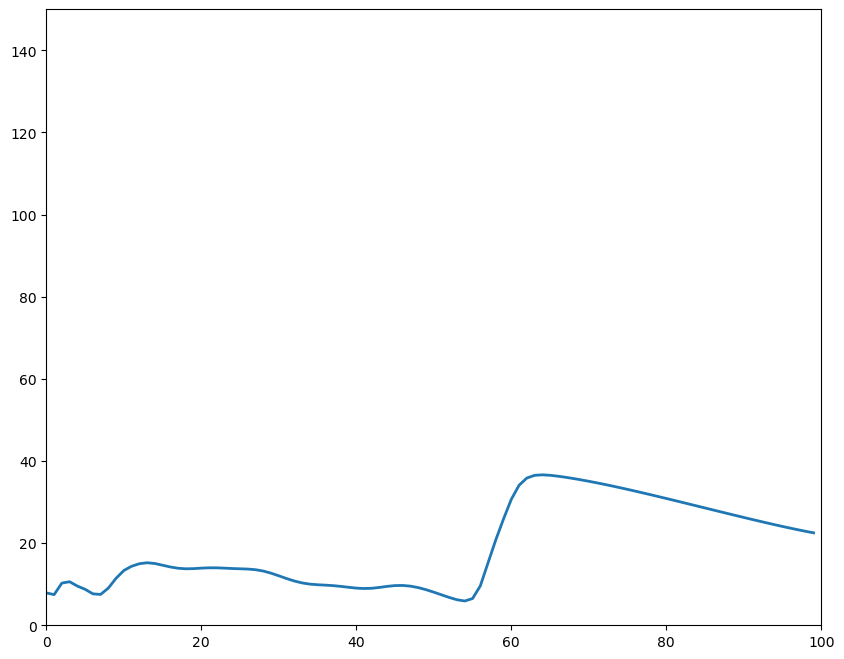

In [9]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(xlim=(0, N), ylim=(0, 150))
line, = plt.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    model.resoudre()
    variation(route, fl_fix=fl_fix)
    x = np.linspace(0, N-1, N)
    y = route.U
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init, frames=500, interval=50, blit=True)

anim.save('densite_evolution.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

## Monte Carlo

In [47]:
def init_route():

    N = 100                        #Taille de la route (en mailles)   
    U_init = np.zeros(N)           #Discrétisation de la route
    #U_init[0:30] = 100
    h = 0.1                         #Taille de chaque maille (en km)
    I = 1                          #Nombre de lignes
    nom = "Section solo test"
    p_c = 100.                     #Densité critique (en vh/km)
    p_max = 150.                   #Densité max (en vh/km)
    V_0 = 50.                      #Vitesse souhaitée (en km/h)                         
    flux_entrant = 800            #Flux de véhicules entrant (en vh/h)
    fl_fix = flux_entrant
    #flux_t_entrant = 0            #Flux de temps d'attente
    #T = 1.4/3600                   #Temps de réaction
    dt =  0.99*(h/V_0)             #CFL

    route = s.section(p_max = p_max, V_0 = V_0, I = I, U = U_init, flux_entrant=flux_entrant, p_c = p_c, nom = nom, sortie=True)
    model = mod.model([route], intersections= None, carrefours= None, dt = dt, h = h)

    return route, model

In [64]:
def simulation(epsilon):
    # T correspond au nombre de pas de temps qu'on veut pour notre simulation
    sigma = []
    route, model = init_route()
    sigma.append(variation(route, fl_fix))

    while route.U[-1] < np.abs(route.U[0]-epsilon):
        model.resoudre()
        
    return route.U

In [66]:
def MC_sim(M):
    # M correspond au nombre d'iter pour MC
    # simulator correspond au modèle à simuler
    stockage = []
    for m in range(M):
        sim = simulation(1e-3)
        stockage.append(sim)
    return stockage

In [92]:
mc_values = MC_sim(1000)

init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05

[[19.02819444 14.57605168 16.98255591 ... 18.2264284  16.72289683
  17.19480272]
 [19.02819444 14.57605168 16.98255591 ... 18.2264284  16.72289683
  17.19480272]
 [19.02819444 14.57605168 16.98255591 ... 18.2264284  16.72289683
  17.19480272]
 ...
 [19.02794971 14.57586819 16.98235215 ... 18.22617727 16.7226838
  17.19462236]
 [19.02772561 14.57567297 16.98215235 ... 18.22594283 16.72247399
  17.19444509]
 [19.02731862 14.57529286 16.9817779  ... 18.22551354 16.7220801
  17.19411228]]
Flux entrant de référence: 800 vh/h
Variation: 800 +/- sigma*800 avec sigma qui suit une loi normal (0,.08)
Nombre d'itérations MC: 1000
Moyenne de la distribution: 18.263056460716317
Variance de la distribution: 1.7134116972936568


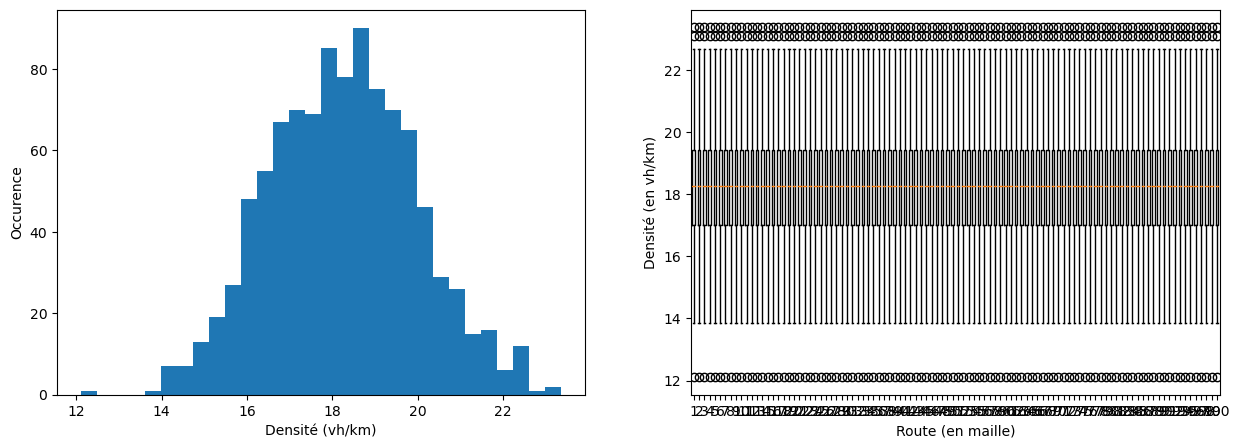

In [93]:
mc_values = np.asarray(mc_values)
mu = np.mean(mc_values[:,-1])
variance = np.std(mc_values[:,-1])

fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].hist(mc_values[:,-1], bins=30)
axs[0].set_xlabel("Densité (vh/km)")
axs[0].set_ylabel("Occurence")

box_val = np.zeros((np.shape(mc_values)[1],np.shape(mc_values)[0]))

for i in range(N):
    box_val[i,:] = mc_values[:,i]

print(box_val)

axs[1].boxplot(box_val.tolist())
axs[1].set_xlabel("Route (en maille)")
axs[1].set_ylabel("Densité (en vh/km)")

print("Flux entrant de référence: 800 vh/h")
print("Variation: 800 +/- sigma*800 avec sigma qui suit une loi normal (0,.08)")
print("Nombre d'itérations MC: 1000")
print("Moyenne de la distribution: " + str(mu))
print("Variance de la distribution: " + str(variance))

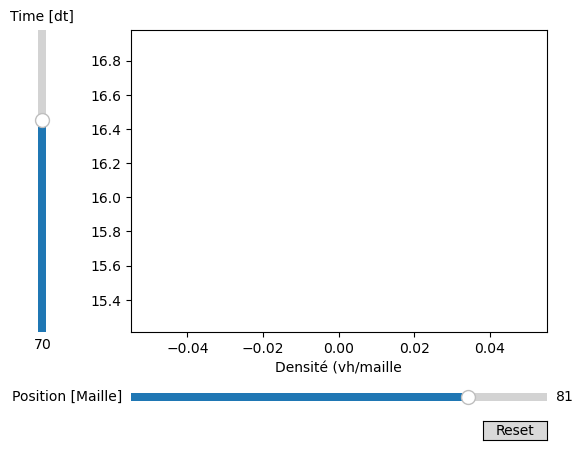

In [46]:
from matplotlib.widgets import Slider, Button

def density_dist(mc_v, t, x):
    return mc_v[:][t][x]

init_t = 70
init_x = 81


fig, ax = plt.subplots()
line, = ax.plot(density_dist(mc_values, init_t, init_x), lw=2)
ax.set_xlabel('Densité (vh/maille')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Position [Maille]',
    valmin=0,
    valmax=100,
    valinit=init_x,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Time [dt]",
    valmin=0,
    valmax=100,
    valinit=init_t,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(density_dist(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

In [ ]:
density_dist(mc_values, init_t, init_x)

array([18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21091654,
       18.21091654, 18.21091654, 18.21091654, 18.21091654, 18.21

In [ ]:
np.asarray(mc_values).tofile('mc.csv', sep =",")